### **For this assignment the only permitted libraries to use are Numpy, Scipy, MatplotLib and Pandas! All four have been imported for you in this Notebook.**

In [6]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [7]:
train_file_path = 'lab1_train.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')

# Convert Timestamp column to datetime
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')


/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


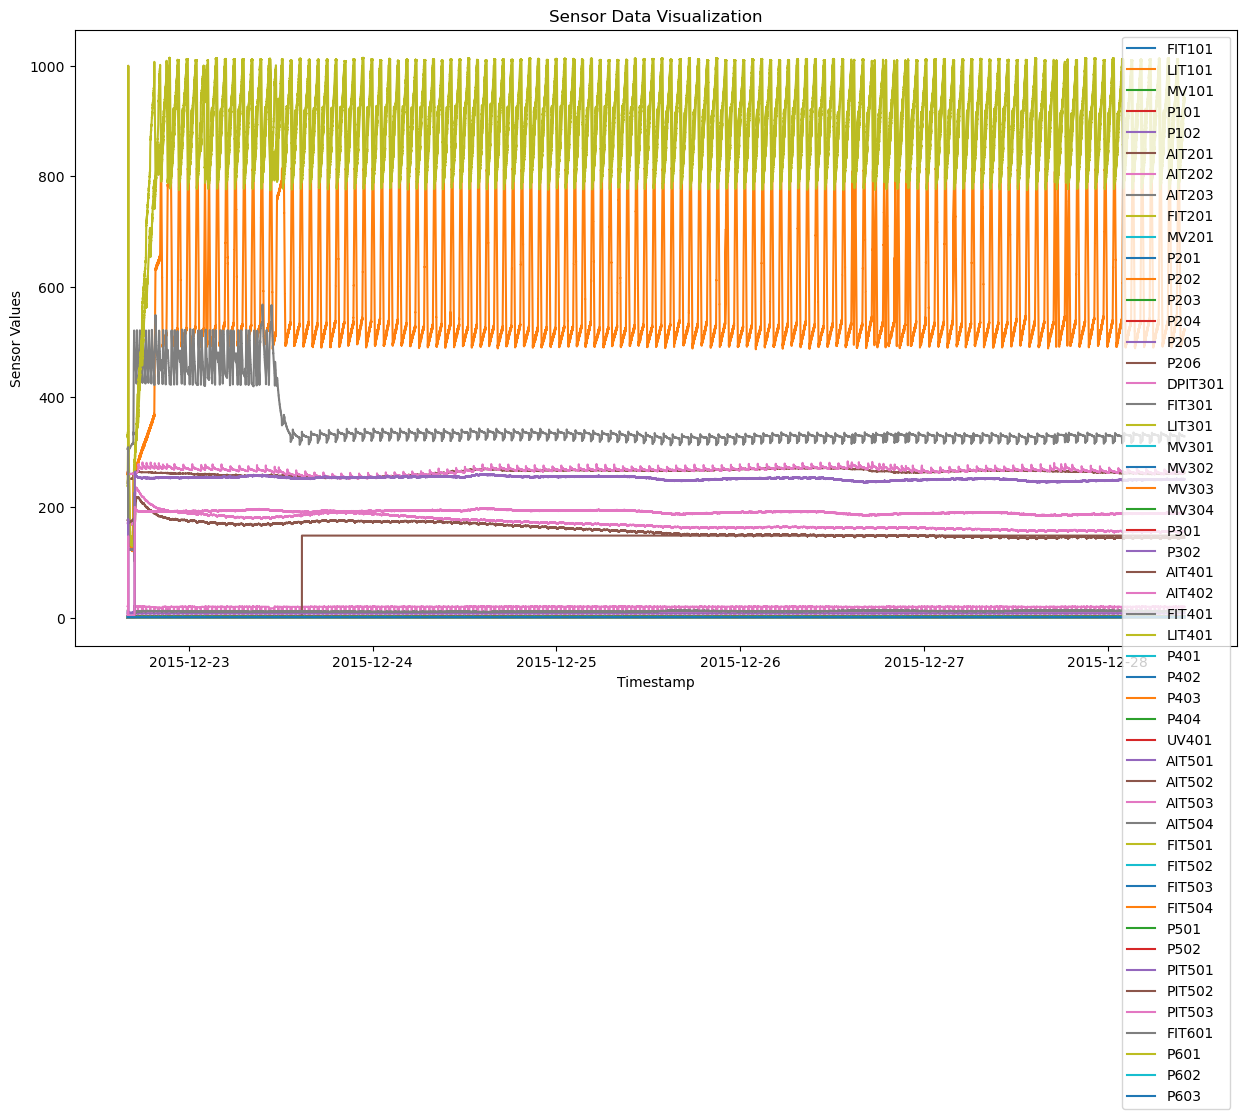

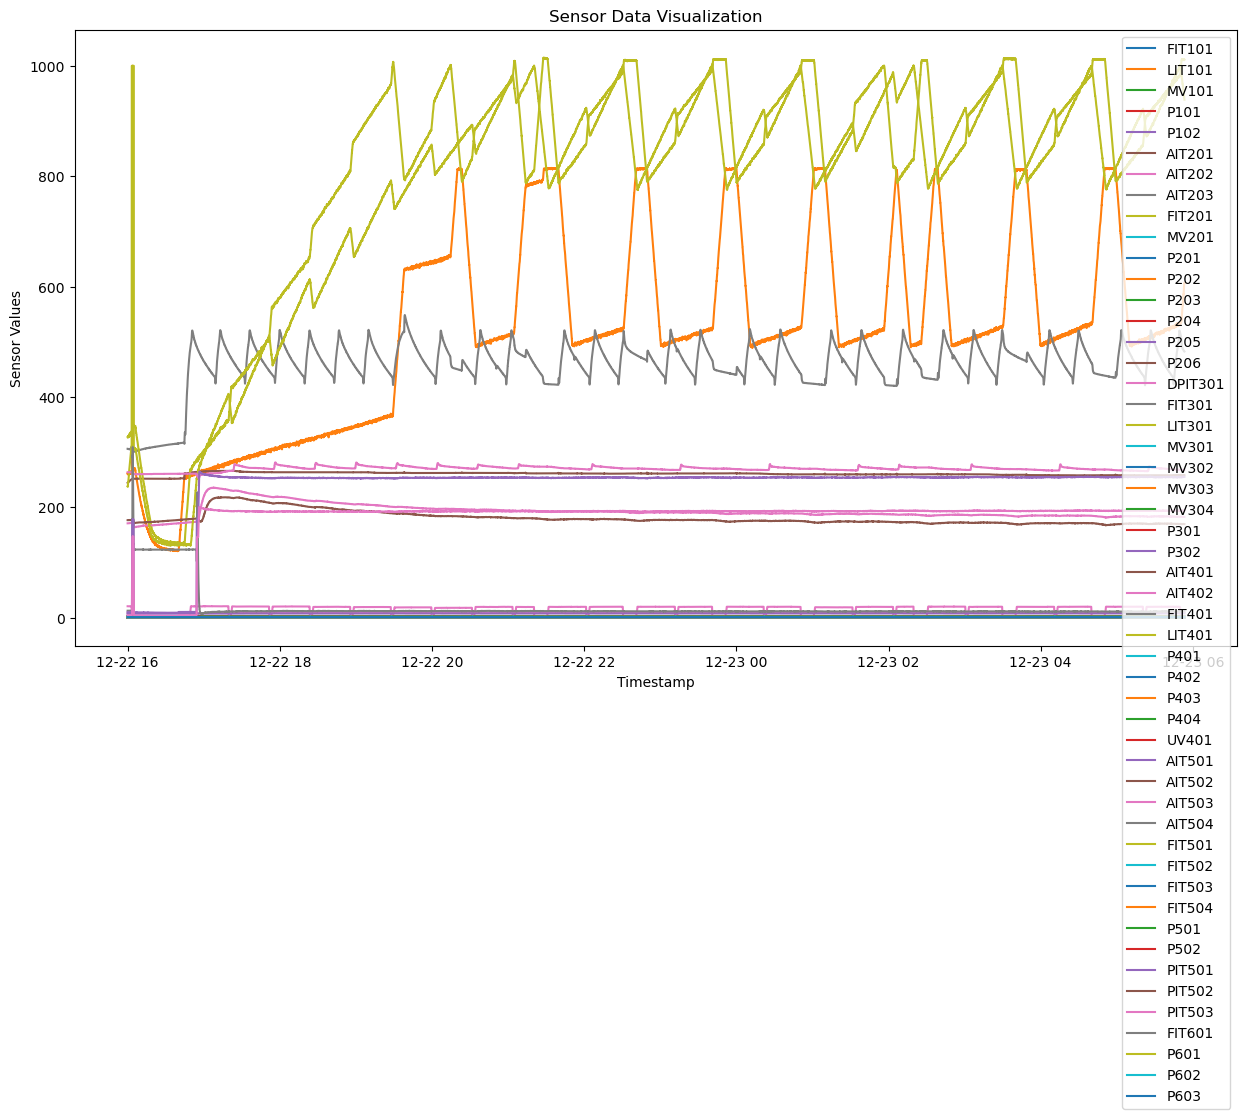

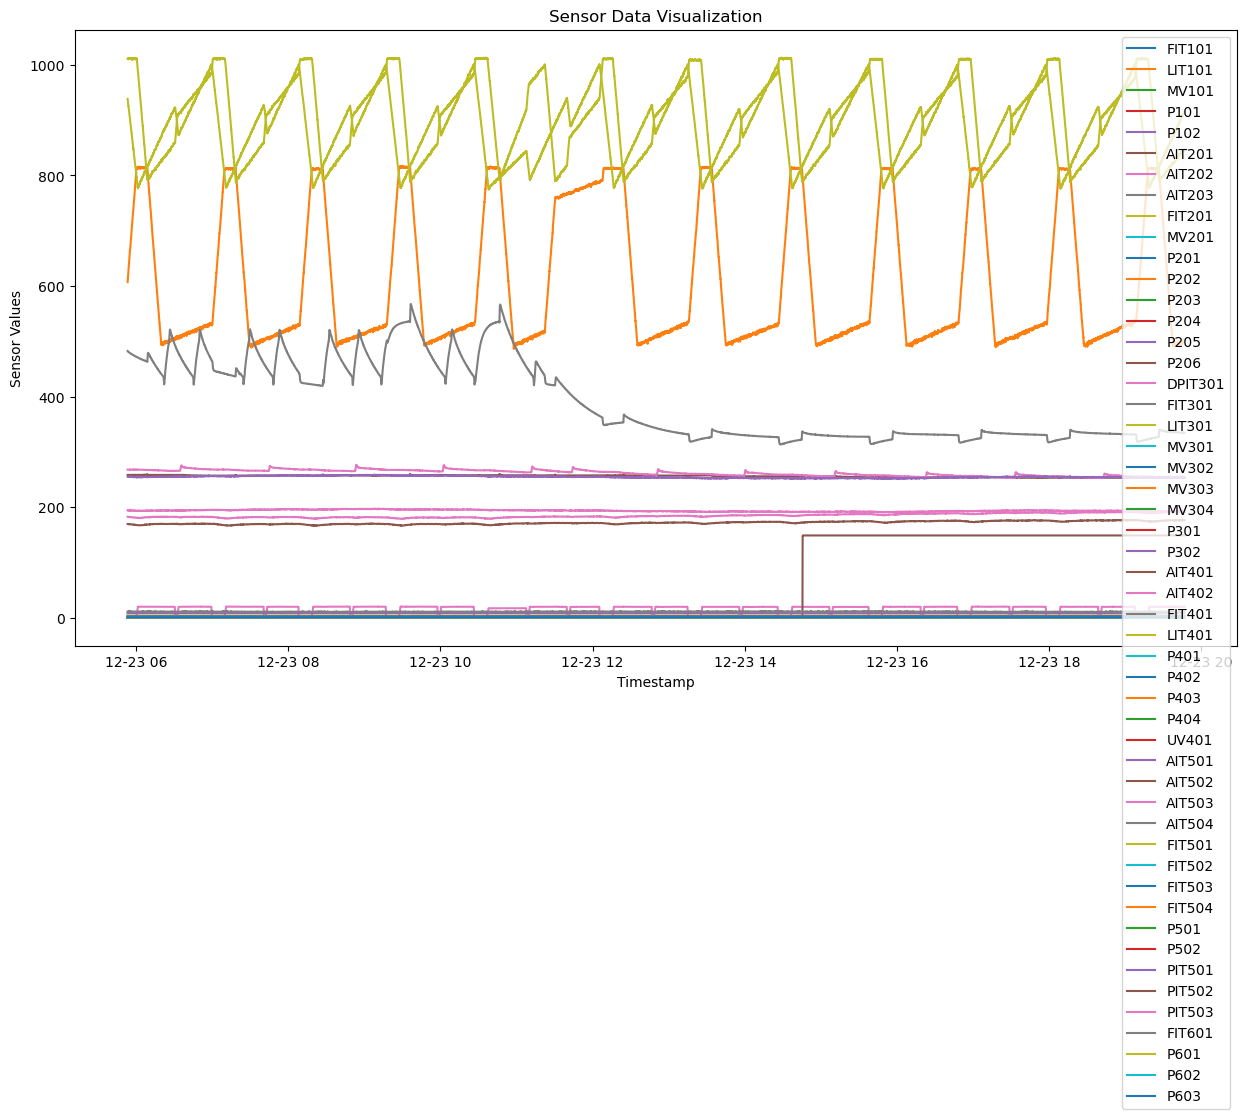

In [11]:
def visualize_sensor_data(df, window=None, sensors=None, title="Sensor Data Visualization"):
    # If window is None, visualize the entire dataset
    if window is None:
        start_index, end_index = 0, len(df)
    else:
        start_index, end_index = window

    # If sensors is None, select all sensor columns
    if sensors is None:
        sensors = df.columns[1:-1]

    # Plot each sensor in a different color
    plt.figure(figsize=(15, 8))
    for sensor in sensors:
        plt.plot(df['Timestamp'][start_index:end_index], df[sensor][start_index:end_index], label=sensor)

    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Values')
    plt.title(title)
    plt.legend()

    plt.show()

# visualize_sensor_data(train_data, window=(0, 1000), sensors=['FIT101', 'LIT101'])
# visualize_sensor_data(train_data, window=(200, 800), sensors=['FIT301'])
visualize_sensor_data(train_data)
visualize_sensor_data(train_data, window=(0, 100000))
visualize_sensor_data(train_data, window=(100000, 1000000))

#### Observations
After observing these plots we can group the signals into 3 categories

- Value < 50
- 50 <= Value <= 300 
- Value > 300

So the next step is to visualize these groups

In [20]:
time_stamp = train_data.iloc[:, 0]
norm_attack = train_data.iloc[:, -1:]
sensors = train_data.iloc[:, 1:-1]

higher_range  = sensors.loc[:, (sensors.mean() > 300 ) | (sensors.max()  > 300)]
mid_range     = sensors.loc[:, (sensors.mean() >= 50 ) & (sensors.mean() <= 300)]
lower_range   = sensors.loc[:, (sensors.mean() < 50  ) & (sensors.max()  < 300) & (sensors.mean() > 5)]
lowest_range  = sensors.loc[:, (sensors.mean() <= 5  ) ]

higher_range_data = pd.concat([time_stamp, higher_range, norm_attack], axis=1)
mid_range_data    = pd.concat([time_stamp, mid_range, norm_attack], axis=1)
lower_range_data  = pd.concat([time_stamp, lower_range, norm_attack], axis=1)
lowest_range_data = pd.concat([time_stamp, lowest_range, norm_attack], axis=1)


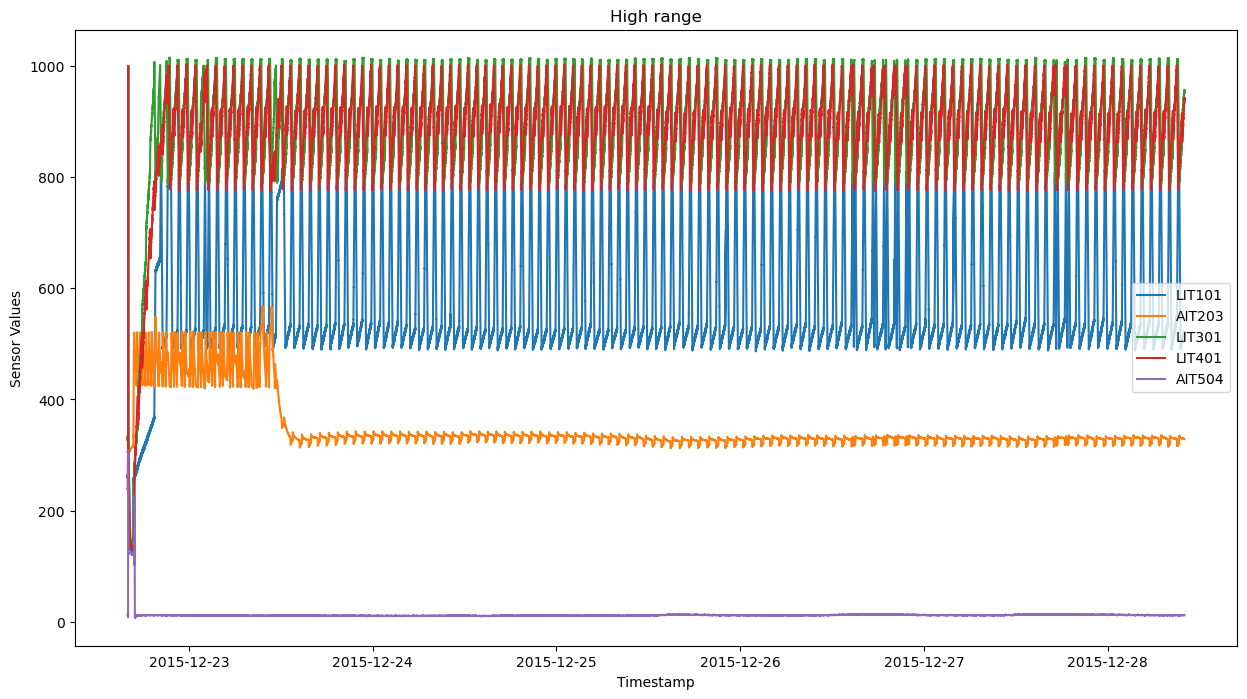

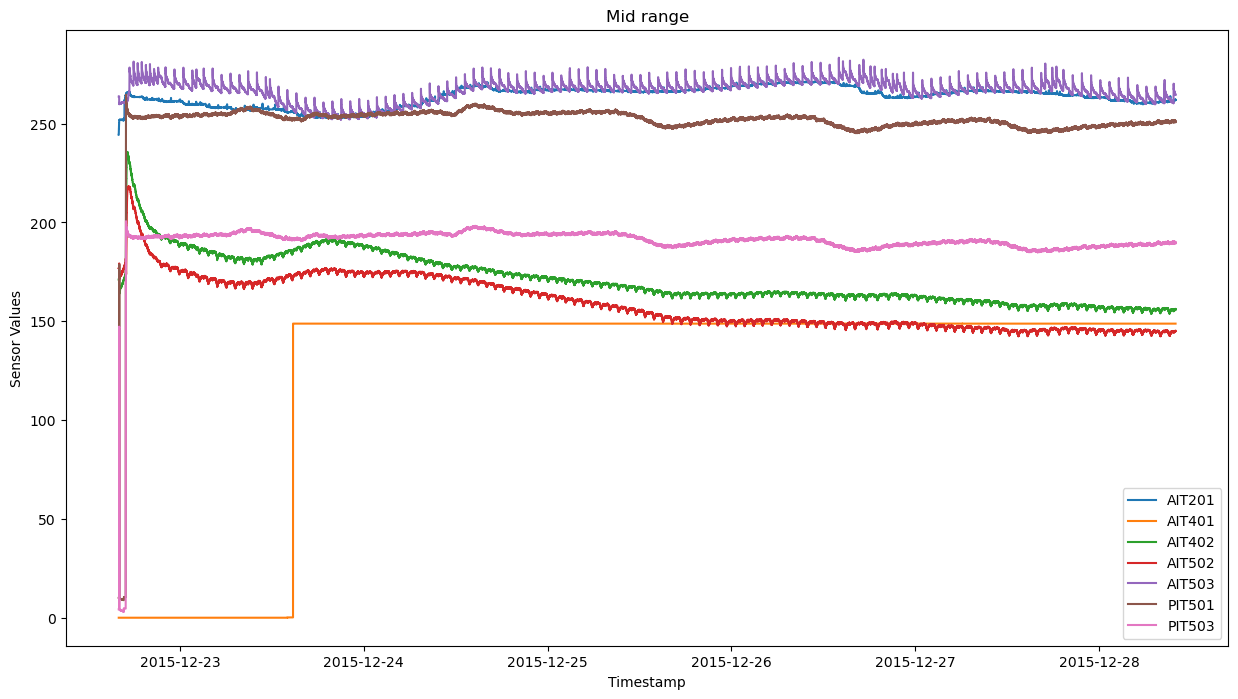

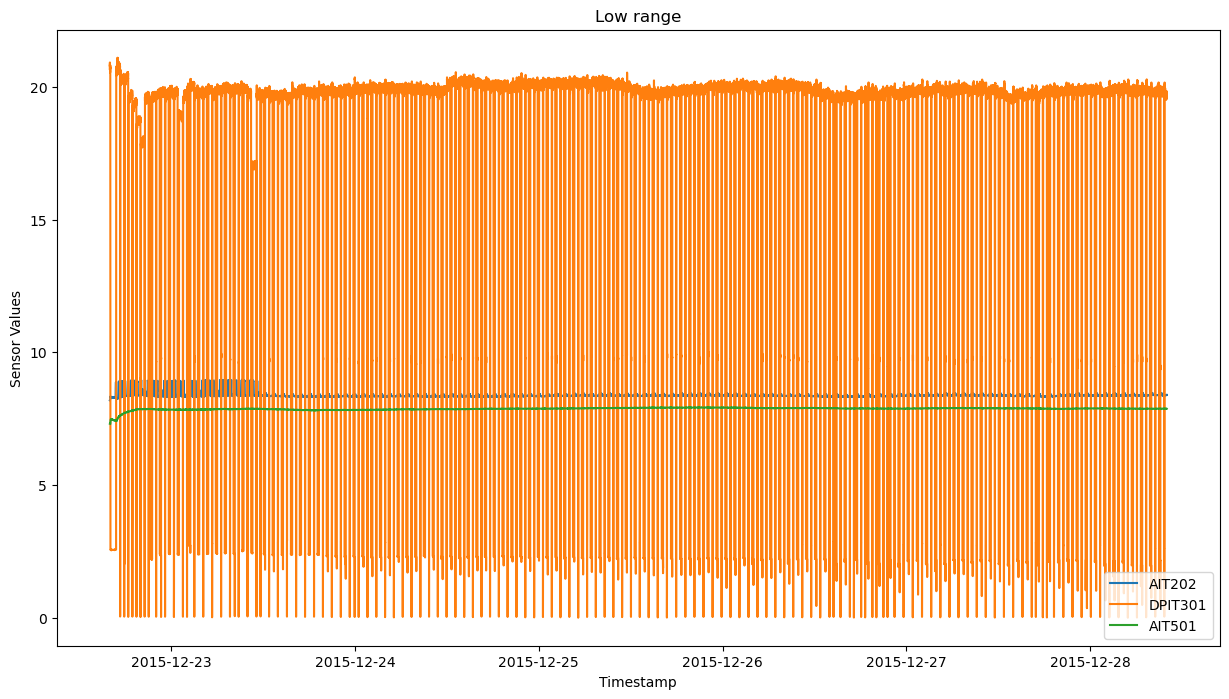

/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


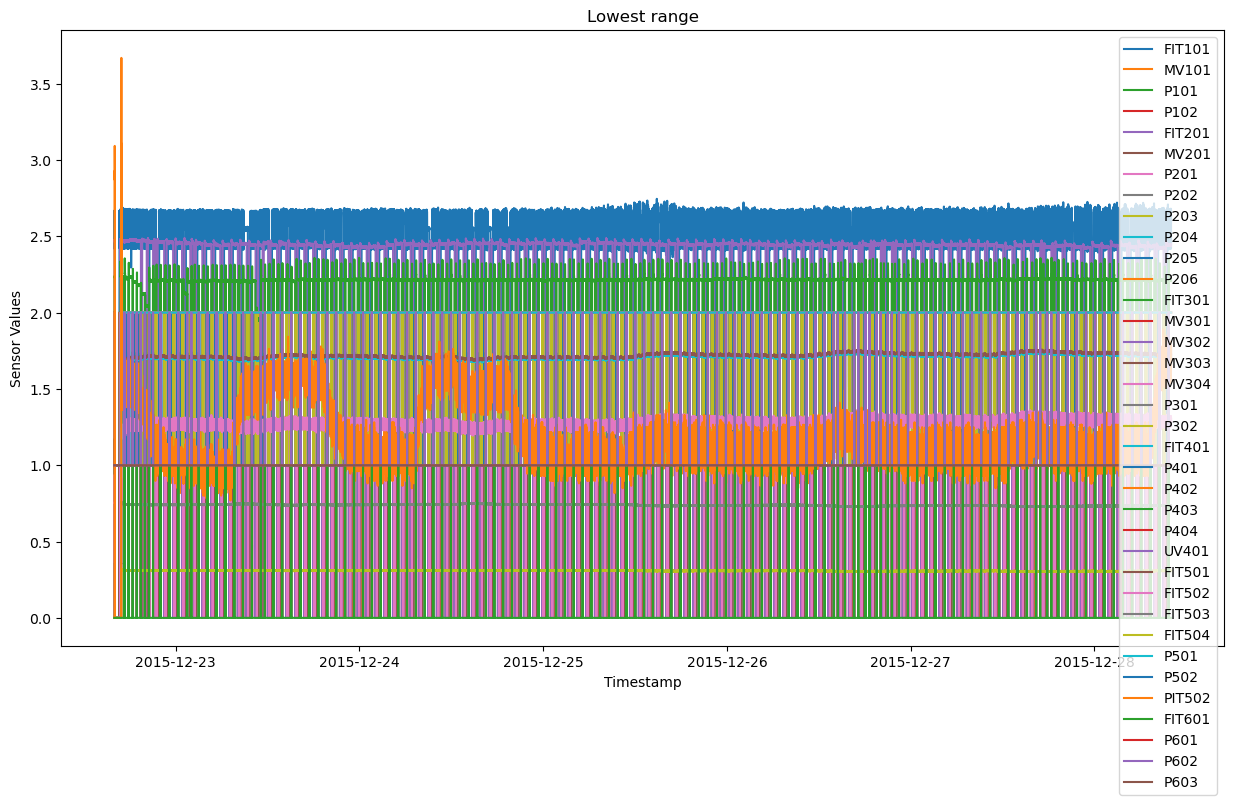

In [13]:
visualize_sensor_data(higher_range_data[:-1], title="High range")
visualize_sensor_data(mid_range_data[:-1],    title="Mid range")
visualize_sensor_data(lower_range_data[:-1],  title="Low range")
visualize_sensor_data(lowest_range_data[:-1], title="Lowest range")


In [21]:
datasets = {
    "Original Data": train_data,
    "Higher Range Data": higher_range_data,
    "Mid Range Data": mid_range_data,
    "Lower Range Data": lower_range_data,
    "Lowest Range Data": lowest_range_data,
}

for name, data in datasets.items():
    print(f"{name}:")
    print(f"Column Names: {list(data.columns)}")
    print(f"(Adjusted) Column Count: {len(data.columns) - 2}")
    print("-" * 50)

Original Data:
Column Names: ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack']
(Adjusted) Column Count: 51
--------------------------------------------------
Higher Range Data:
Column Names: ['Timestamp', 'LIT101', 'AIT203', 'LIT301', 'LIT401', 'AIT504', 'Normal/Attack']
(Adjusted) Column Count: 5
--------------------------------------------------
Mid Range Data:
Column Names: ['Timestamp', 'AIT201', 'AIT401', 'AIT402', 'AIT502', 'AIT503', 'PIT501', 'PIT503', 'Normal/Attack']
(Adjusted) Column Count: 7
---------------------------------------------

Unfortenately the majority of the data is still in the same range,which makes individual sensors harder to follow
So we split it into 3

In [23]:

split_count = 3
splits = [pd.concat([time_stamp, lowest_range_data[cols]],axis=1) for cols in np.array_split(lowest_range_data.columns.to_list()[1:], split_count)]


/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


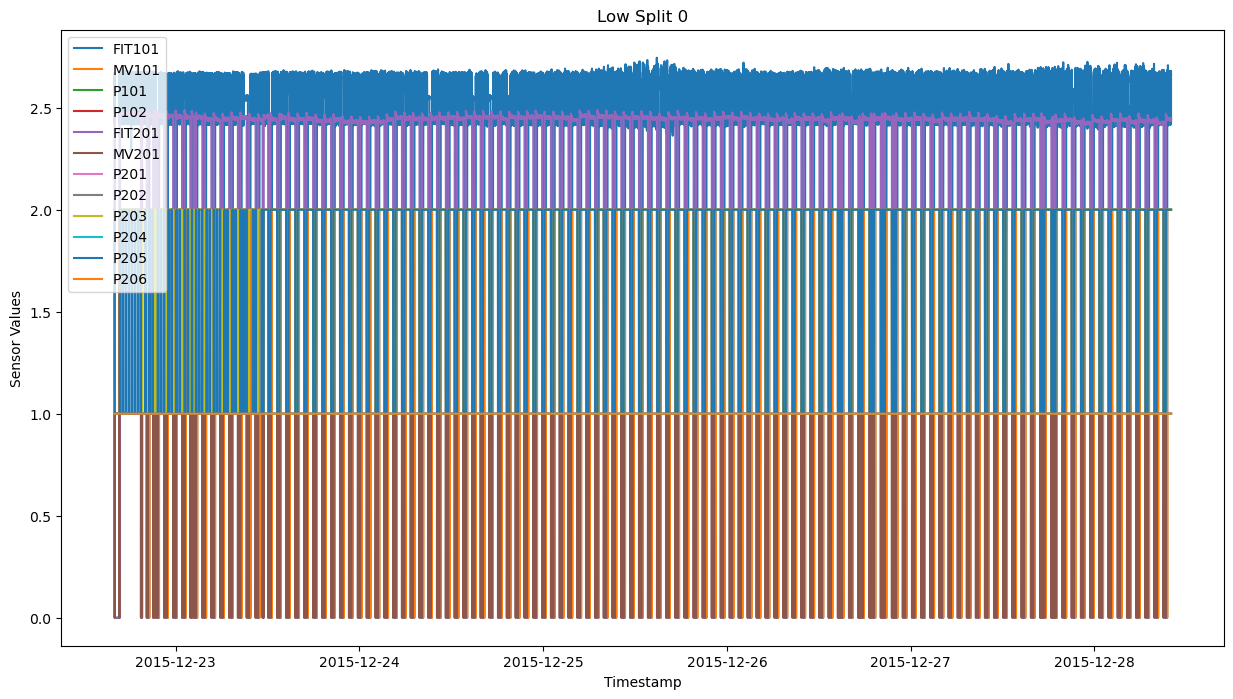

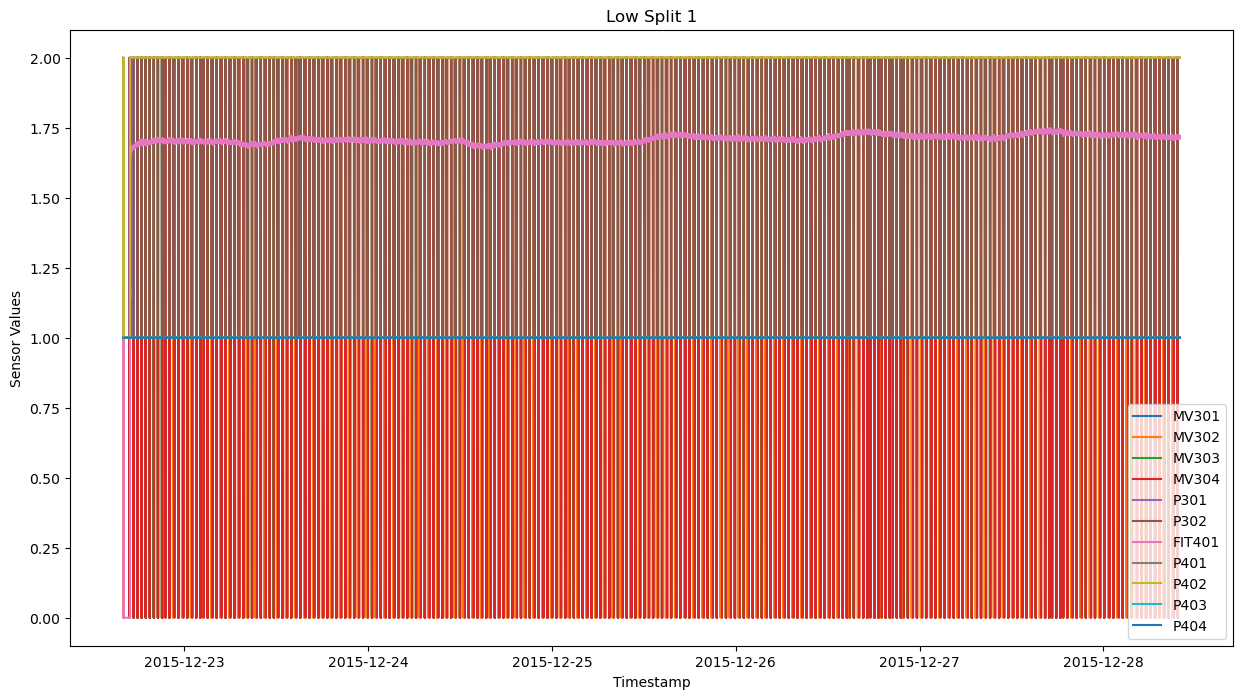

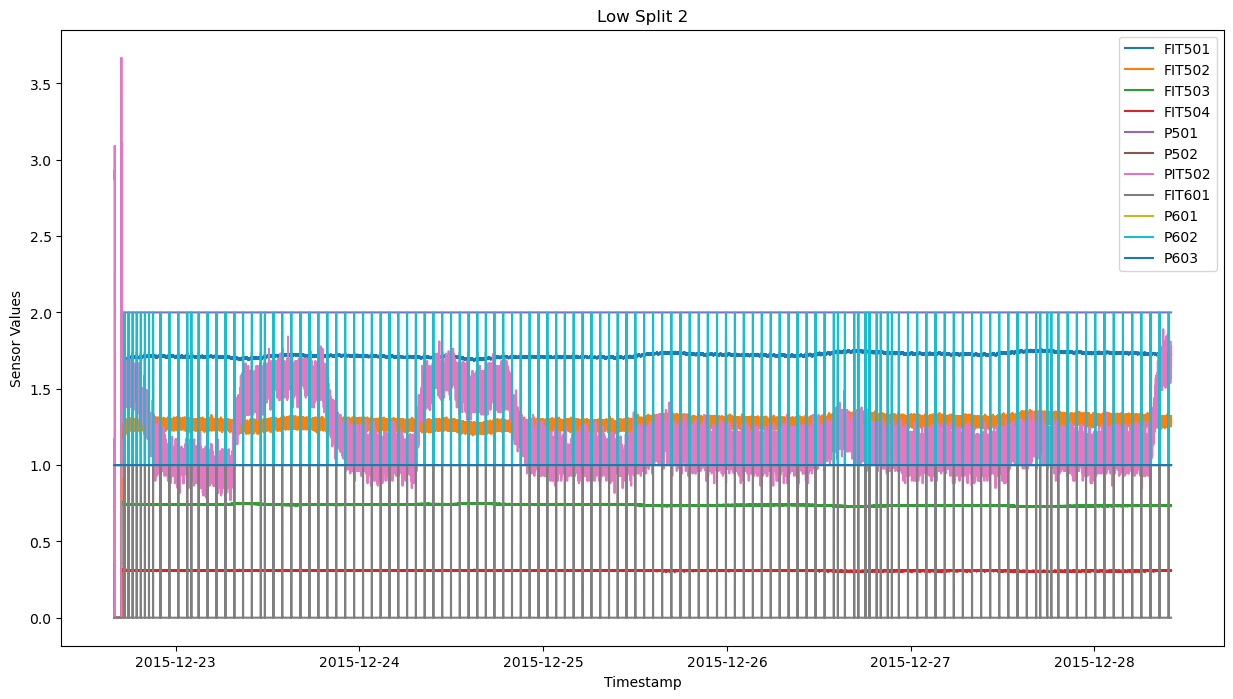

In [24]:
for i, split in enumerate(splits):
  visualize_sensor_data(split[:-1], title=f"Low Split {i + 1}")


Now we can see the differences between signals more clearly

Key takaways are:
- The majority of the signals are constant and periodic
- Not every signal howeever, some stay flat with ocasionally large jumps



#### What types of signals are there?

I dibided

#### Are the signals correlated? Do they show cyclic behavior?